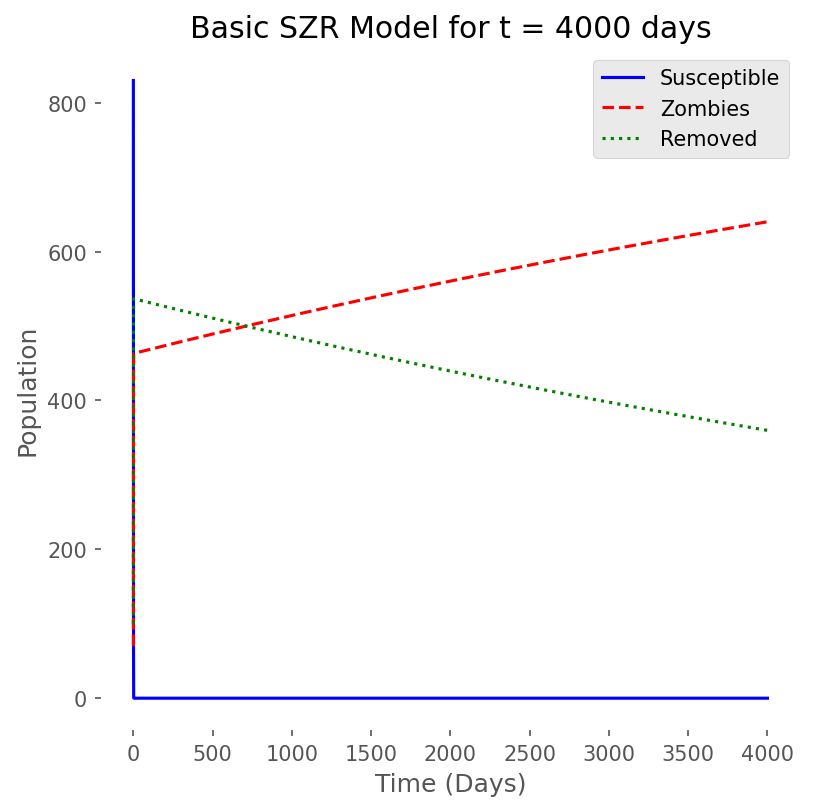

In [2]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

""" Simulation of SZR Moodel with sample data
    Susceptible-Zombie-Recovered Model with imaginary sample data
    
    Reference: 
            1. Kermack, W. O., & McKendrick, A. G. (1927). A contribution to the mathematical theory of epidemics. 
            Proceedings of the royal society of london. 
            Series A, Containing papers of a mathematical and physical character, 115(772), 700-721.
            2. SIR Model of Epidemics- Basic Model and Examples, Revised September 22, 2005, University of Rochester
                URL- http://www2.me.rochester.edu/courses/ME406/webexamp5/sir1.pdf
            3. British Medical Journal, March 4 1978, p. 587
                URL- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1603269/pdf/brmedj00115-0064.pdf

   Part of MS Thesis at Universität Koblenz-Landau
   Note: this program uses the following libraries-  Numpy, Matplotlib, Scipy
   Python Version 3.7
"""

# importing libraries
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(6, 6), dpi=150)
 
# Just for a pretier plot
plt.style.use('ggplot')

# Parameter values
beta = 0.0095
alpha = 0.005
zeta = 0.0001
N = 1000  # total population


# Defining Function of the SZR ODE
def model(t, x):
    S = x[0] # Intital Susceptible Population
    Z = x[1] # Initial Zombie Population
    dsdt = - beta*S*Z # Susceptible
    dzdt = zeta*(N - S - Z) + (beta - alpha)*S*Z # Zombies
    dxdt = [dsdt, dzdt]
    return dxdt

# Initial Condition. Susceptible= 830, Zombies= 70
x0 = [830, 70]

# Time, as in number of days. Total days= 10
#t = np.array([0, 10])
#tspan = np.linspace(t[0], t[1], 11)

# Time, as in number of days. Total days= 4000
t = np.array([0, 4000])
tspan = np.linspace(t[0], t[1], 4001)

# Calculating numerical solution of the given ODEs
x = solve_ivp(model, t, x0, t_eval=tspan)

time = x.t
susceptible = x.y[0];
zombies = x.y[1];
removed = (N - susceptible - zombies);

# Plot
plt.plot(time, susceptible, 'b-', label="Susceptible") # Susceptible Population Graph
plt.plot(time, zombies, 'r--', label="Zombies") # Zombies Population Graph
plt.plot(time, removed, 'g:', label="Removed") # Removed Population Graph
plt.ylabel('Population')
plt.xlabel('Time (Days)')
plt.legend(loc='best')
plt.title('Basic SZR Model for t = 4000 days')
plt.grid(True)
ax = plt.gca()
ax.set_facecolor('w')
plt.show()

__author__ = "Md Tariqul Islam"
__version__ = "1.0"
__maintainer__ = "Tariqul"
__email__ = "tariquldipu@uni-koblenz.de"
__status__ = "Final"

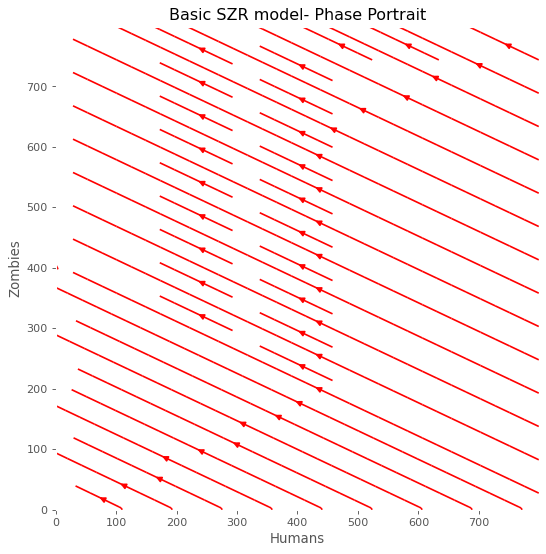

In [3]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

""" Simulation of SZR Moodel with sample data
    Susceptible-Zombie-Recovered Model with imaginary sample data
    
    Reference: 
            1. Kermack, W. O., & McKendrick, A. G. (1927). A contribution to the mathematical theory of epidemics. 
            Proceedings of the royal society of london. 
            Series A, Containing papers of a mathematical and physical character, 115(772), 700-721.
            2. SIR Model of Epidemics- Basic Model and Examples, Revised September 22, 2005, University of Rochester
                URL- http://www2.me.rochester.edu/courses/ME406/webexamp5/sir1.pdf
            3. British Medical Journal, March 4 1978, p. 587
                URL- https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1603269/pdf/brmedj00115-0064.pdf

   Part of MS Thesis at Universität Koblenz-Landau
   Note: this program uses the following libraries-  Numpy, Matplotlib, Scipy
   Python Version 3.7
"""

# Basic SZR Model- PHASE PORTRAIT

# importing libraries

import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
from matplotlib.pyplot import figure
figure(figsize=(8, 8), dpi=80)

# Parameter values
beta = 0.0095
alpha = 0.005
zeta = 0.0001
N = 1000 # Total population

x = np.arange(0, 800, 1)
y = np.arange(0, 800, 1)
S, Z = np.meshgrid(x, y)

S_dash = - beta*S*Z # Susceptible
Z_dash = zeta*(N - S - Z) + (beta - alpha)*S*Z #Zombies

plt.streamplot(S, Z, S_dash, Z_dash, density=1.0, color='r')
plt.title("Basic SZR model- Phase Portrait")
plt.axis("scaled")
ax = plt.gca()
ax.set_facecolor('w')
ax.set_xlabel("Humans")
ax.set_ylabel("Zombies")
plt.show()

__author__ = "Md Tariqul Islam"
__version__ = "1.0"
__maintainer__ = "Tariqul"
__email__ = "tariquldipu@uni-koblenz.de"
__status__ = "Final"